# Testing the data pre-processing part for individual runs

Following the "generate_hybrid_hlt_datasets_dcm.py" script

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from tqdm import trange # For progress bars

In [2]:
variant = "2023"
dataset_dir = "/eos/user/j/jhoya/DAQ/AnomalyDetection/strada/datasets/csv_2023"

run_number = "448519"

data_set_x_df = pd.read_csv(f'{dataset_dir}/hlt_data_pd_{run_number}.csv', index_col=0)


In [3]:
data_set_x_df.describe()

,DF_IS:HLT-32:tpu-rack-01.DCM:HLT-32:tpu-rack-01:pc-tdq-tpu-01002.info,DF_IS:HLT-32:tpu-rack-01.DCM:HLT-32:tpu-rack-01:pc-tdq-tpu-01003.info,DF_IS:HLT-32:tpu-rack-01.DCM:HLT-32:tpu-rack-01:pc-tdq-tpu-01004.info,DF_IS:HLT-32:tpu-rack-01.DCM:HLT-32:tpu-rack-01:pc-tdq-tpu-01005.info,DF_IS:HLT-32:tpu-rack-01.DCM:HLT-32:tpu-rack-01:pc-tdq-tpu-01006.info,DF_IS:HLT-32:tpu-rack-01.DCM:HLT-32:tpu-rack-01:pc-tdq-tpu-01007.info,DF_IS:HLT-32:tpu-rack-01.DCM:HLT-32:tpu-rack-01:pc-tdq-tpu-01008.info,DF_IS:HLT-32:tpu-rack-01.DCM:HLT-32:tpu-rack-01:pc-tdq-tpu-01009.info,DF_IS:HLT-32:tpu-rack-01.DCM:HLT-32:tpu-rack-01:pc-tdq-tpu-01010.info,DF_IS:HLT-32:tpu-rack-01.DCM:HLT-32:tpu-rack-01:pc-tdq-tpu-01011.info,...,DF_IS:HLT-32:tpu-rack-05.DCM:HLT-32:tpu-rack-05:pc-tdq-tpu-05023.info,DF_IS:HLT-32:tpu-rack-05.DCM:HLT-32:tpu-rack-05:pc-tdq-tpu-05024.info,DF_IS:HLT-32:tpu-rack-05.DCM:HLT-32:tpu-rack-05:pc-tdq-tpu-05025.info,DF_IS:HLT-32:tpu-rack-05.DCM:HLT-32:tpu-rack-05:pc-tdq-tpu-05026.info,DF_IS:HLT-32:tpu-rack-05.DCM:HLT-32:tpu-rack-05:pc-tdq-tpu-05027.info,DF_IS:HLT-32:tpu-rack-05.DCM:HLT-32:tpu-rack-05:pc-tdq-tpu-05028.info,DF_IS:HLT-32:tpu-rack-05.DCM:HLT-32:tpu-rack-05:pc-tdq-tpu-05029.info,DF_IS:HLT-32:tpu-rack-05.DCM:HLT-32:tpu-rack-05:pc-tdq-tpu-05030.info,DF_IS:HLT-32:tpu-rack-05.DCM:HLT-32:tpu-rack-05:pc-tdq-tpu-05031.info,DF_IS:HLT-32:tpu-rack-05.DCM:HLT-32:tpu-rack-05:pc-tdq-tpu-05032.info
count,4106.000000,4.106000e+03,4.106000e+03,4.106000e+03,4.106000e+03,4.106000e+03,4.106000e+03,4.106000e+03,4.106000e+03,4.106000e+03,...,4.106000e+03,4.106000e+03,4.106000e+03,4.106000e+03,4.106000e+03,4.106000e+03,4.106000e+03,4.106000e+03,4.106000e+03,4.106000e+03
mean,11.285627,-8.287441e+34,-8.287441e+34,-8.287441e+34,-8.287441e+34,-8.287441e+34,-8.287441e+34,-8.287441e+34,-8.287441e+34,-8.287441e+34,...,-8.287441e+34,-8.287441e+34,-8.287441e+34,-8.287441e+34,-8.287441e+34,-8.287441e+34,-8.287441e+34,-8.287441e+34,-1.657488e+35,-8.287441e+34
std,35.051781,5.310433e+36,5.310433e+36,5.310433e+36,5.310433e+36,5.310433e+36,5.310433e+36,5.310433e+36,5.310433e+36,5.310433e+36,...,5.310433e+36,5.310433e+36,5.310433e+36,5.310433e+36,5.310433e+36,5.310433e+36,5.310433e+36,5.310433e+36,7.509172e+36,5.310433e+36
min,0.000000,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,...,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38
25%,1.602706,1.799994e+00,1.410799e+00,1.800175e+00,1.800042e+00,1.600342e+00,1.600009e+00,1.600911e+00,1.600033e+00,1.400086e+00,...,1.800278e+00,1.600117e+00,1.996477e+00,2.000024e+00,1.600386e+00,1.600165e+00,1.604222e+00,1.600089e+00,1.800000e+00,1.800027e+00
50%,3.196364,3.000617e+00,3.203901e+00,3.000263e+00,3.001408e+00,3.199621e+00,3.000750e+00,3.002608e+00,2.999991e+00,3.000064e+00,...,3.000083e+00,2.999860e+00,3.000244e+00,3.000072e+00,3.000173e+00,3.000239e+00,3.196263e+00,3.199720e+00,3.000707e+00,3.000002e+00
75%,12.400092,1.260018e+01,1.161571e+01,1.240297e+01,1.279993e+01,1.261099e+01,1.279987e+01,1.259998e+01,1.200027e+01,1.220001e+01,...,1.260064e+01,1.220011e+01,1.240121e+01,1.279997e+01,1.180125e+01,1.240160e+01,1.221660e+01,1.279957e+01,1.260006e+01,1.280009e+01
max,231.977723,2.281994e+02,2.297573e+02,2.286001e+02,2.368016e+02,2.439866e+02,2.321976e+02,2.286002e+02,2.282225e+02,2.294008e+02,...,2.299994e+02,2.306005e+02,2.313974e+02,2.326010e+02,2.291987e+02,2.313982e+02,2.295170e+02,2.345997e+02,2.293988e+02,2.311990e+02


In [4]:
data_set_x_df.iloc[500:501]

,DF_IS:HLT-32:tpu-rack-01.DCM:HLT-32:tpu-rack-01:pc-tdq-tpu-01002.info,DF_IS:HLT-32:tpu-rack-01.DCM:HLT-32:tpu-rack-01:pc-tdq-tpu-01003.info,DF_IS:HLT-32:tpu-rack-01.DCM:HLT-32:tpu-rack-01:pc-tdq-tpu-01004.info,DF_IS:HLT-32:tpu-rack-01.DCM:HLT-32:tpu-rack-01:pc-tdq-tpu-01005.info,DF_IS:HLT-32:tpu-rack-01.DCM:HLT-32:tpu-rack-01:pc-tdq-tpu-01006.info,DF_IS:HLT-32:tpu-rack-01.DCM:HLT-32:tpu-rack-01:pc-tdq-tpu-01007.info,DF_IS:HLT-32:tpu-rack-01.DCM:HLT-32:tpu-rack-01:pc-tdq-tpu-01008.info,DF_IS:HLT-32:tpu-rack-01.DCM:HLT-32:tpu-rack-01:pc-tdq-tpu-01009.info,DF_IS:HLT-32:tpu-rack-01.DCM:HLT-32:tpu-rack-01:pc-tdq-tpu-01010.info,DF_IS:HLT-32:tpu-rack-01.DCM:HLT-32:tpu-rack-01:pc-tdq-tpu-01011.info,...,DF_IS:HLT-32:tpu-rack-05.DCM:HLT-32:tpu-rack-05:pc-tdq-tpu-05023.info,DF_IS:HLT-32:tpu-rack-05.DCM:HLT-32:tpu-rack-05:pc-tdq-tpu-05024.info,DF_IS:HLT-32:tpu-rack-05.DCM:HLT-32:tpu-rack-05:pc-tdq-tpu-05025.info,DF_IS:HLT-32:tpu-rack-05.DCM:HLT-32:tpu-rack-05:pc-tdq-tpu-05026.info,DF_IS:HLT-32:tpu-rack-05.DCM:HLT-32:tpu-rack-05:pc-tdq-tpu-05027.info,DF_IS:HLT-32:tpu-rack-05.DCM:HLT-32:tpu-rack-05:pc-tdq-tpu-05028.info,DF_IS:HLT-32:tpu-rack-05.DCM:HLT-32:tpu-rack-05:pc-tdq-tpu-05029.info,DF_IS:HLT-32:tpu-rack-05.DCM:HLT-32:tpu-rack-05:pc-tdq-tpu-05030.info,DF_IS:HLT-32:tpu-rack-05.DCM:HLT-32:tpu-rack-05:pc-tdq-tpu-05031.info,DF_IS:HLT-32:tpu-rack-05.DCM:HLT-32:tpu-rack-05:pc-tdq-tpu-05032.info
2023-04-06 09:55:35.001262+02:00,1.203469,1.400044,2.792235,1.600054,2.399929,1.000034,1.600062,2.599943,1.20014,2.800224,...,2.599894,1.799929,1.000497,2.800442,2.199993,2.799935,2.391554,1.600152,1.60013,1.800811


In [5]:
def get_tpu_number(channel_name):
    parameters = [int(substring) for substring in re.findall(r'\d+', channel_name)]
    return parameters[4]

def extract_label(column_name):
    return column_name.split(':')[-1].split('.')[0].split('-')[-1]

def get_rack_hardware_configuration(rack_number: int, variant: str = '2023'):
    
    if variant == '2018':
        if 44 <= rack_number <= 54:
            return 0
        elif 55 <= rack_number <= 63:
            return 1
        elif (70 <= rack_number <= 77) or\
                    (79 <= rack_number <= 90):
            return 2
        elif 16 <= rack_number <= 26:
            return 3
        else:
            raise ValueError(f'Rack number {rack_number} not '
                                f'in known nodes for variant {variant}')

    # need to check this and include the rest of the years
    if variant == '2023':
        if 44 <= rack_number <= 54:
            return 0
        elif 55 <= rack_number <= 63:
            return 1
        elif (64 <= rack_number <= 77) or\
                    (79 <= rack_number <= 95):
            return 2
        elif rack_number <= 26:
            return 3
        else:
            raise ValueError(f'Rack number {rack_number} not in known nodes for variant {variant}')
    else:
        raise NotImplementedError(f'Rack hardware configuration identification not implemented for variant {variant}')

# Rack color mapping
rack_colors = {  0: '#D81B60',
                 1: '#1E88E5',
                 2: '#FFC107',
                 3: '#004D40',
                 4: '#C43F42',
                 5: '#6F8098',
                 6: '#D4FC14',
                 7: '#1CB2C5',
                 8: '#18F964',
                 9: '#1164B3'}

# Set font sizes for plots
SMALL_SIZE = 13
MEDIUM_SIZE = 13
BIGGER_SIZE = 13

plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=BIGGER_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)

In [6]:
tpu_labels = list(data_set_x_df.columns.values)

In [7]:
# Get column names, tpu numbers, and rack number
column_names = list(data_set_x_df.columns.values)
print(f'Channels: {len(column_names)}')

nan_amount = np.mean(np.sum(pd.isna(data_set_x_df.to_numpy()), 1)/data_set_x_df.shape[1])
print(f'Mean sparsity original dataset: {100*nan_amount:.3f} %')

data_set_x_df.dropna(axis=0,
                  thresh=50,
                  inplace=True)

data_set_x_np = data_set_x_df.to_numpy()

nan_amount = np.mean(np.sum(pd.isna(data_set_x_np), 1)/data_set_x_df.shape[1])
print(f'Mean sparsity preprocessed: {100*nan_amount:.3f} %')

tpu_numbers = [int(extract_label(label)) for label in column_names]
rack_numbers = np.floor_divide(tpu_numbers, 1000)
hardware_configurations = [get_rack_hardware_configuration(rack_number, variant='2023') for rack_number in rack_numbers]
channel_colors = [rack_colors[config] for config in hardware_configurations]

Channels: 152
Mean sparsity original dataset: 0.000 %
Mean sparsity preprocessed: 0.000 %


Plotting: 100%|██████████| 152/152 [00:00<00:00, 1123.75it/s]


Printing the dates just in case we want to check something fast in Grafana
New day starts at: 2023-04-06 09:13:55


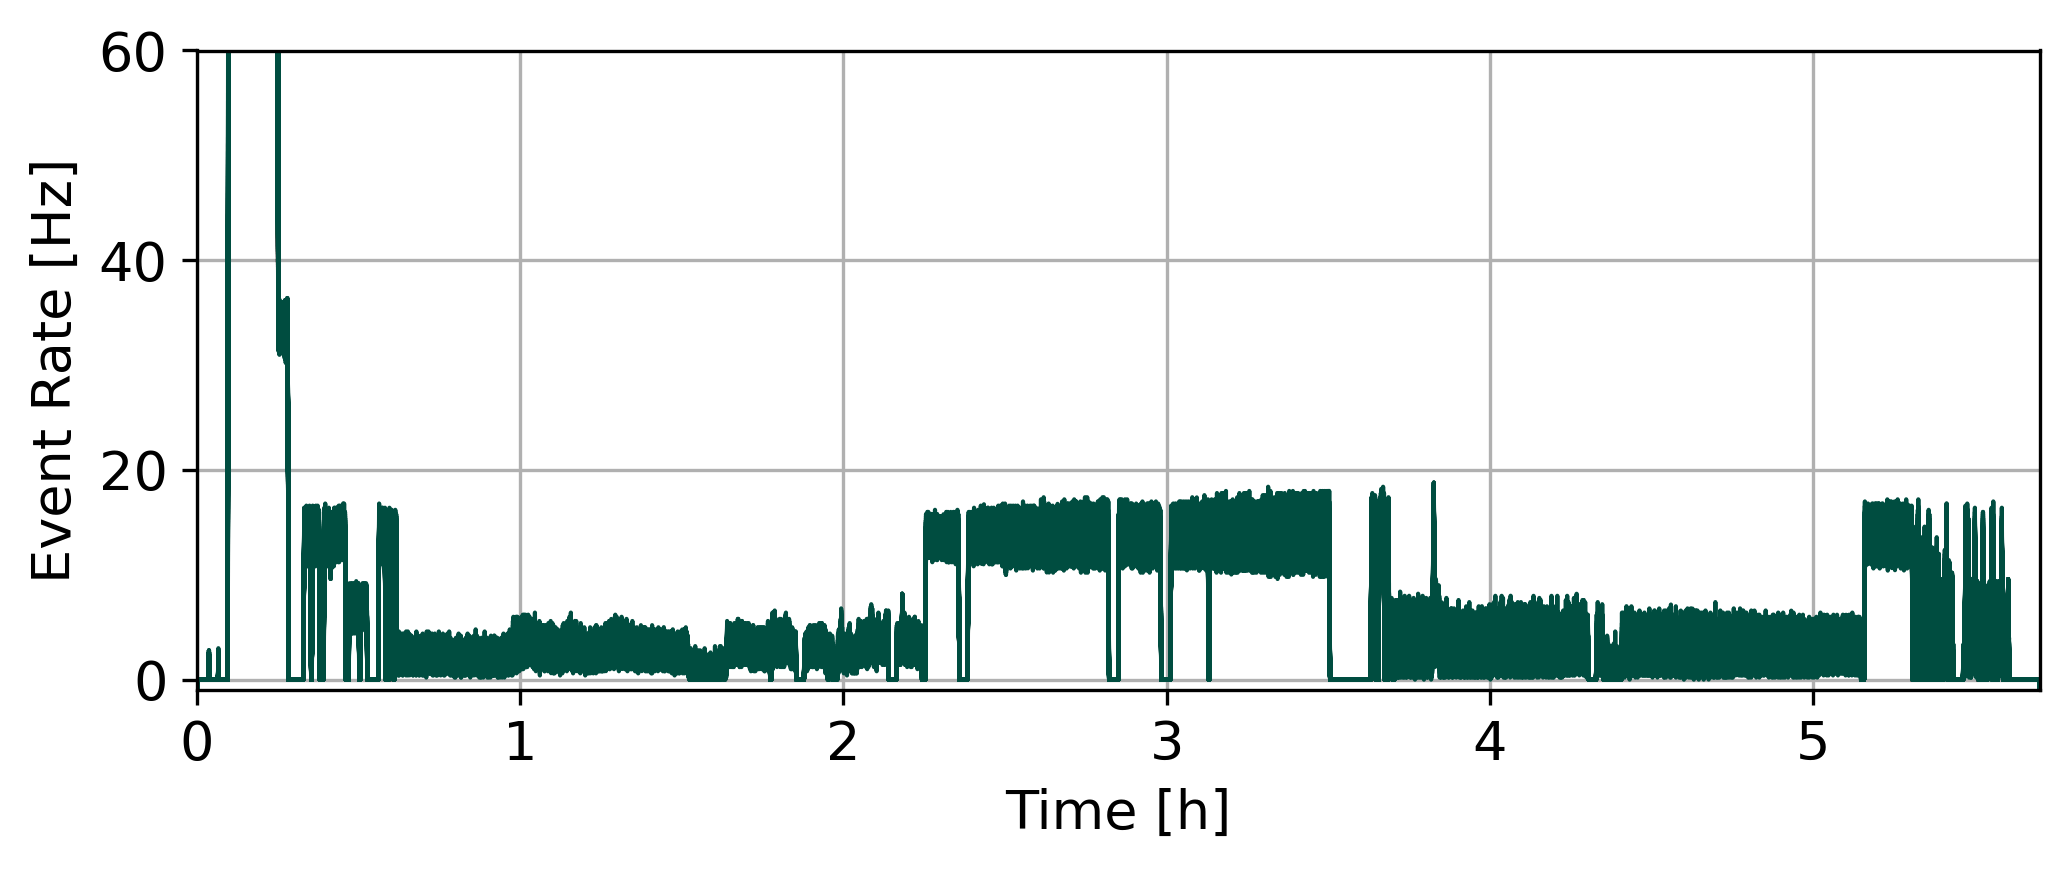

In [8]:
# Plot all channels
fig, ax = plt.subplots(figsize=(7, 3), dpi=300)
ax.set_xlabel('Time [h]')
ax.set_ylabel('Event Rate [Hz]')
ax.set_ylim(-1, 60)
ax.grid()

# Use a numeric time axis (time in hours since the first timestamp) for efficiency. To much to plot...
first_timestamp = pd.Timestamp(data_set_x_df.index[0]).tz_convert('Europe/Berlin')
time_delta_seconds = np.arange(len(data_set_x_np)) * 5  # Each time step is 5 seconds
x_plot = time_delta_seconds / 3600  # Convert time to hours

# Plot all channels with the progress bar
for i in trange(data_set_x_np.shape[-1], desc='Plotting'):
    ax.plot(x_plot, data_set_x_np[:, i], linewidth=1, color=channel_colors[i])
    

print("Printing the dates just in case we want to check something fast in Grafana")
# Print the first timestamp of each new day from the DataFrame's index
last_printed_day = None
for timestamp in data_set_x_df.index:
    current_timestamp = pd.Timestamp(timestamp).tz_convert('Europe/Berlin')
    
    current_day = current_timestamp.date()
    
    # Print the date if it's the first occurrence of a new day
    if current_day != last_printed_day:
        print(f"New day starts at: {current_timestamp.strftime('%Y-%m-%d %H:%M:%S')}")
        last_printed_day = current_day


# Format the x-axis to display numeric hours (no datetime formatting needed)
ax.set_xlim(left=0, right=x_plot[-1])

plt.tight_layout()
plt.show()

In [9]:

print(f'Data set: {run_number} size: {len(data_set_x_df)}')


Data set: 448519 size: 4106


In [10]:

column_names = list((data_set_x_df).columns.values)

print(f'Channels: {len(column_names)}')


Channels: 152


In [11]:
nan_amount = np.mean(np.sum(pd.isna(data_set_x_df.to_numpy()), 1)/data_set_x_df.shape[1])

print(f'Mean sparsity original datasets: {100*nan_amount:.3f} %')

Mean sparsity original datasets: 0.000 %


In [12]:
# Keeping rows with at least 50 non-null values makes sense as we'd still have enough data to work with.
# In any case, should we consider imputation? or changing the threshold in the dropna functions?

data_set_x_df.dropna(axis=0,
                        thresh=50,
                        inplace=True)

nan_amount = np.mean(np.sum(pd.isna(data_set_x_df.to_numpy()), 1)/data_set_x_df.shape[1])

print(f'Mean sparsity preprocessed: {100*nan_amount:.3f} %')

Mean sparsity preprocessed: 0.000 %


In [13]:
def get_tpu_number(channel_name):
    parameters = [int(substring) for substring in re.findall(r'\d+', channel_name)]
    # print(f'{channel_name}: {parameters}')
    return parameters[-1]

In [14]:
# Getting the list of tpu numbers and racks
tpu_numbers = [get_tpu_number(label) for label in column_names]

tpu_numbers_unique = np.array(list(set(tpu_numbers)))

rack_numbers = np.floor_divide(tpu_numbers, 1000)

In [15]:
racks, counts = np.unique(rack_numbers, return_counts=True)

print('Train set - Number of TPUs per rack:')

for rack, count in zip(racks, counts):
    print(f'{rack}: {count}')

Train set - Number of TPUs per rack:
1: 30
2: 31
3: 30
4: 30
5: 31


In [16]:
# TPUs are all the time being desabled and enabled. The following numbers should be similar, but don't expect them to be equal
print(f'Unique TPUs in the data set: {len(tpu_numbers_unique)}')

Unique TPUs in the data set: 152


In [17]:
# Let's save the unreduced h5 file:

# Save dataset
data_set_x_df.to_hdf(f'./h5_datasets/unreduced_hlt_{run_number}_set_{variant}_x.h5',
                                    key=f'unreduced_hlt_{run_number}_set_x',
                                    mode='w')

In [17]:
import math
import re
from collections import defaultdict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [18]:
def create_channel_names(median_labels, stdev_labels):

    median_labels = ['m_{}'.format(median_label)\
                        for median_label in median_labels]

    stdev_labels = ['std_{}'.format(stdev_label)
                        for stdev_label in stdev_labels]

    labels = np.concatenate((median_labels,
                                stdev_labels))

    return labels


# Unlabeled data set

### New approach to optimize this part of the code.
#### In this way we save 10' more or less

In [19]:
# Sort columns numerically, with medians first
def sort_columns_custom(columns):
    def sort_key(col):
        match = re.match(r'^(.*?)_(\d+)$', col)
        if match:
            prefix, num = match.groups()
            num = int(num)
            if prefix == 'm':
                prefix_index = 0  # Medians first
            elif prefix == 'std':
                prefix_index = 1  # Standard deviations next
            else:
                prefix_index = 2  # This should be empty!!!
                print("What do we have here??")
            return (prefix_index, num)
        else:
            return (2, col)  # Non-matching columns go at the end
    return sorted(columns, key=sort_key)

column_to_rack = pd.Series(rack_numbers, index=data_set_x_df.columns)
# Group columns by rack numbers
grouped = data_set_x_df.groupby(column_to_rack, axis=1)

# Compute median and standard deviation
median_df = grouped.median()
std_df = grouped.std(ddof=0)
#ddof stands for "Delta Degrees of Freedom"
#ddof=0: Calculates the population standard deviation.
#ddof=1: Calculates the sample standard deviation.
#std_df = grouped.std() # as a default dd0f=1, but I explicitly use it here to match the other code.

# Rename columns
median_df.columns = [f'm_{int(rack)}' for rack in median_df.columns]
std_df.columns = [f'std_{int(rack)}' for rack in std_df.columns]

# Concatenate along columns
rack_data_df = pd.concat([median_df, std_df], axis=1)

# Sorting
# Apply the custom sorting function
sorted_columns = sort_columns_custom(rack_data_df.columns)
rack_data_df = rack_data_df.reindex(columns=sorted_columns)
#rack_data_df = rack_data_df.reindex(sorted(rack_data_df.columns), axis=1)

# Replace NaNs with -1
rack_data_df = rack_data_df.fillna(-1)


# Calculate percentage of NaN values
nan_amount = 100 * rack_data_df.isna().sum().sum() / (rack_data_df.shape[0] * rack_data_df.shape[1])

print('NaN amount reduced train set: {:.3f} %'.format(nan_amount))

data_set_unlabeled_x_df = rack_data_df

NaN amount reduced train set: 0.000 %


/tmp/ipykernel_675/1601172789.py:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  std_df = grouped.std(ddof=0)


In [20]:
print(data_set_unlabeled_x_df.iloc[500:501])

                                       m_1       m_2       m_3       m_4  \
2023-04-06 09:55:35.001262+02:00  1.800275  2.199917  2.100306  1.800144   

                                       m_5     std_1     std_2     std_3  \
2023-04-06 09:55:35.001262+02:00  2.000002  0.685394  0.650507  0.528794   

                                     std_4     std_5  
2023-04-06 09:55:35.001262+02:00  0.574603  0.591282  


In [21]:

# Not clipping the data at the end....
# import numpy as np
# import pandas as pd

# def clip_dataframe(data_frame, lower_bound, upper_bound):
#     data_array = data_frame.to_numpy()

#     np.clip(data_array, lower_bound, upper_bound, out=data_array)

#     # Convert the clipped array back to DataFrame
#     clipped_data_frame = pd.DataFrame(data_array, columns=data_frame.columns, index=data_frame.index)
    
#     return clipped_data_frame

# # Usage example
# data_set_unlabeled_x_df = clip_dataframe(data_set_unlabeled_x_df, -1e9, 1e9)



In [22]:
data_set_unlabeled_x_df

,m_1,m_2,m_3,m_4,m_5,std_1,std_2,std_3,std_4,std_5
2023-04-06 09:13:55.001297+02:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.686220e+38,1.488972e+38,1.667036e+38,1.639802e+38,1.657468e+38
2023-04-06 09:14:00.001196+02:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2023-04-06 09:14:05.001319+02:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2023-04-06 09:14:10.001134+02:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2023-04-06 09:14:15.001305+02:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
2023-04-06 14:55:40.001203+02:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2023-04-06 14:55:45.001097+02:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2023-04-06 14:55:50.001222+02:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2023-04-06 14:55:55.001178+02:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [23]:
print(data_set_unlabeled_x_df.iloc[500:501])

                                       m_1       m_2       m_3       m_4  \
2023-04-06 09:55:35.001262+02:00  1.800275  2.199917  2.100306  1.800144   

                                       m_5     std_1     std_2     std_3  \
2023-04-06 09:55:35.001262+02:00  2.000002  0.685394  0.650507  0.528794   

                                     std_4     std_5  
2023-04-06 09:55:35.001262+02:00  0.574603  0.591282  


In [24]:
# Save dataset
data_set_unlabeled_x_df.to_hdf(f'./h5_datasets/reduced_hlt_{run_number}_set_{variant}_x.h5',
                                    key=f'reduced_hlt_{run_number}_set_x',
                                    mode='w')

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plotting_DL_datasets(dataset_x_df):
    # Ensure the index is a DatetimeIndex
    if not isinstance(dataset_x_df.index, pd.DatetimeIndex):
        dataset_x_df.index = pd.to_datetime(dataset_x_df.index)

    # DatetimeIndex is timezone-naive or timezone-aware?
    if dataset_x_df.index.tz is None:
        dataset_x_df.index = dataset_x_df.index.tz_localize('Europe/Paris')
    else:
        # If timezone-aware, convert to CERN time
        dataset_x_df.index = dataset_x_df.index.tz_convert('Europe/Paris')

    # Index ready for plotting
    timestamp = dataset_x_df.index

    # timestamp is ready to be used, and it will remain the index
    dataset_x_df.index = timestamp  # Assign the localized/converted timestamp back to the index

    # Select only the median and std columns
    median_columns = [col for col in dataset_x_df.columns if col.startswith('m_')]
    std_columns = [col for col in dataset_x_df.columns if col.startswith('std_')]

    # Plot each median and corresponding standard deviation as a function of time
    plt.figure(figsize=(14, 8))

    for median_col, std_col in zip(median_columns, std_columns):
        plt.plot(timestamp, dataset_x_df[median_col], label=f'{median_col}')
        plt.fill_between(timestamp, 
                         dataset_x_df[median_col] - dataset_x_df[std_col], 
                         dataset_x_df[median_col] + dataset_x_df[std_col], 
                         alpha=0.2, label=f'{median_col} ± {std_col}')

    plt.title('Medians and Standard Deviations Over Time')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.ylim(-1, 60)
    plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=2, borderaxespad=0.)

    # Set x-axis major formatter to show year, month, day, hour, minute, and second
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))

    # Optionally set major locator to improve readability (e.g., every 10 minutes)
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

    # Rotate and format the x-axis dates for better readability
    plt.gcf().autofmt_xdate()

    plt.show()


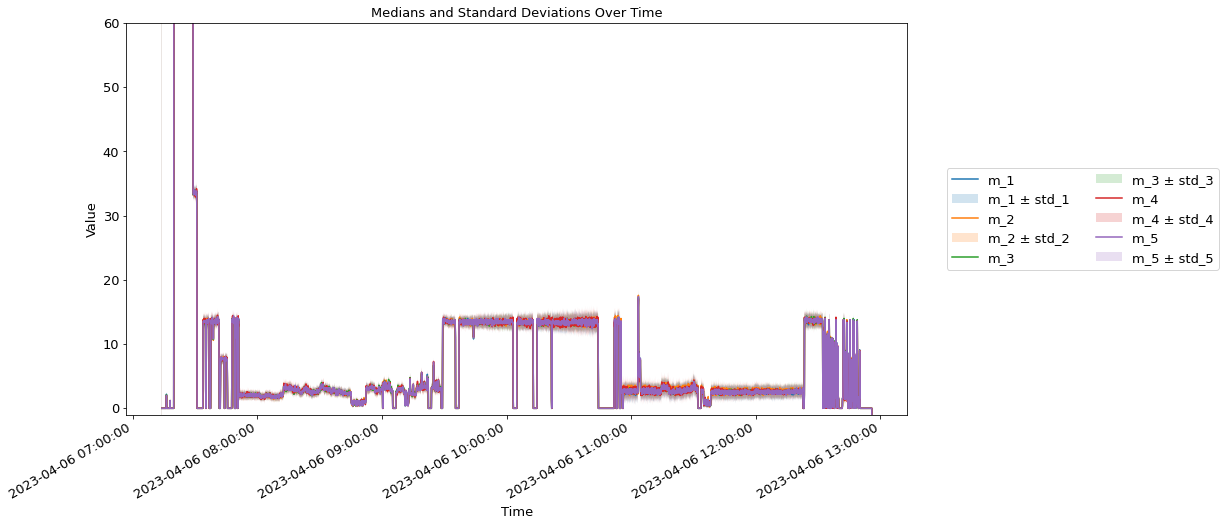

In [26]:
plotting_DL_datasets(data_set_unlabeled_x_df)